In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
imputed=pd.read_csv (r'C:\Users\Manos\OneDrive/Thesis Final/LSTM/all_nurse_with_FI_imputed.tab',sep='\t',low_memory=False)

In [3]:
X=imputed.iloc[:,1:-1] #we dont select idauniq
y=imputed.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=32)

In [4]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [5]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

Visualize results

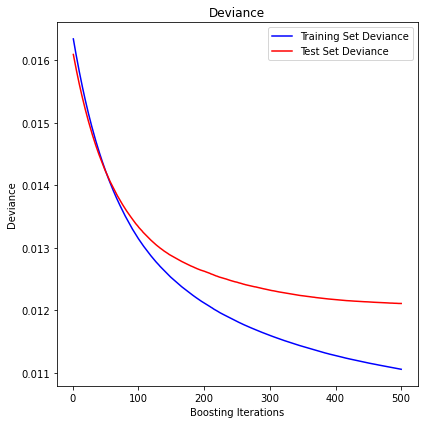

In [6]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error,mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
adjr2=1-(((1-r2)*(len(y)-1))/((len(y)-X.shape[1]-1)))
print('MSE: %.3f' % mse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
print('r2: %.3f' % r2)
print('adjr2: %.3f' % adjr2)

MSE: 0.012
MAE: 0.081
MAPE: 23205162234105.109
r2: 0.250
adjr2: 0.250


In [8]:
MSE: 0.012
MAE: 0.081
MAPE: 0.690
r2: -2.325
adjr2: -2.327

In [9]:
LSTM_prediction=pd.read_csv (r'C:\Users\Manos\Desktop\Lstm Prediction',sep='\t',low_memory=False)

In [10]:
FI_from_LSTM=reg.predict(LSTM_prediction.iloc[:,1:])#

In [12]:
FI_from_LSTM= pd.DataFrame(FI_from_LSTM, columns = ['FI'])
FI_from_LSTM.insert(0,'idauniq',LSTM_prediction.iloc[:,0])
FI_from_LSTM.to_csv(r'C:\Users\Manos\Desktop\GBDT_FI_LSTM',sep='\t',index=False)